<a href="https://colab.research.google.com/github/nghess/micrograd/blob/main/makemore_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import numpy as np
import urllib3 
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [278]:
# Grab text file from github
http = urllib3.PoolManager()
textfile = http.request('GET', 'https://raw.githubusercontent.com/nghess/makemore/master/names.txt')
words = str(textfile.data, 'utf-8').splitlines()

In [279]:
# Take a peak at text file
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [280]:
# Set up bigram zip
b = {}
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1

In [281]:
# Sort 
b = sorted(b.items(), key = lambda kv: -kv[1])

In [282]:
# Int <-> string codes
chars = sorted(list(set(''.join(words))))
stoi = {s:i for i,s in enumerate(chars, 1)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [283]:
# Initialize tensor for all 2 character combinations
N = torch.zeros([27,27], dtype=torch.int32)

In [284]:
# Fill in tensor with counts for each combination
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

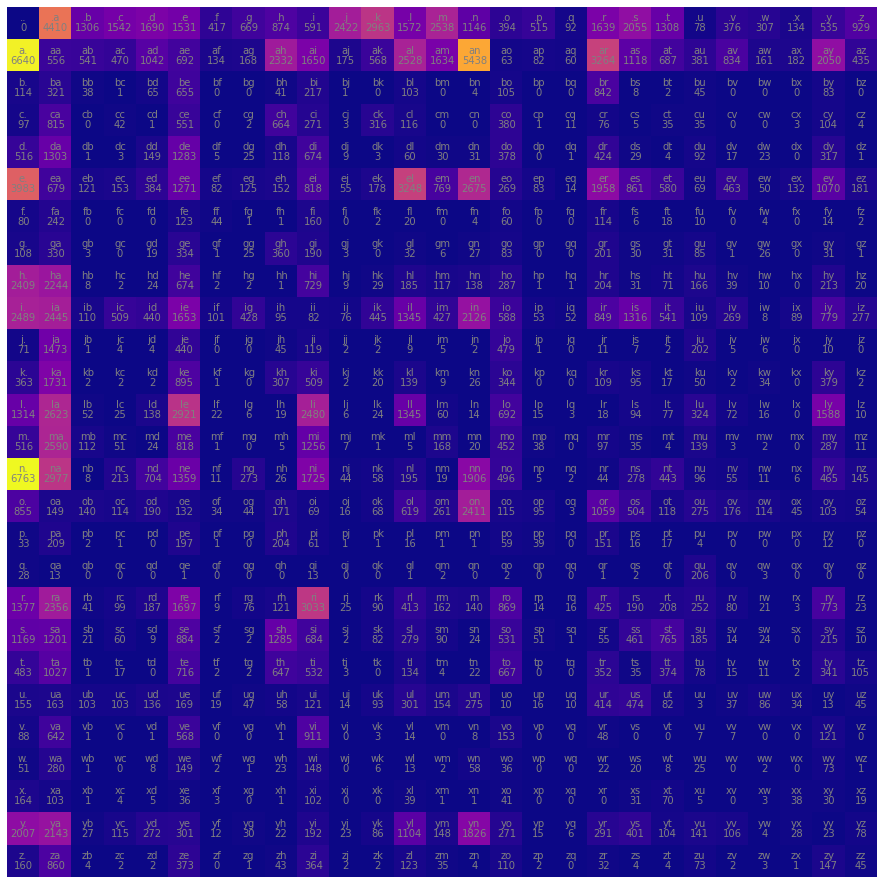

In [285]:
# Visualize tensor of character combinations and their counts
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='plasma')
for i in range(27):
  for j in range(27):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
    plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [286]:
# Build tensor of normalize probabilities
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [287]:
# Generate some names by picking from probability distribution
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  ix = 0
  out = []
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out[:-1]))

mor
axx
minaymoryles
kondlaisah
anchshizarie


In [290]:
# Evaluate training data to think about how loss function will work
b = {}
n = 0
log_likelihood = 0.0

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{-log_likelihood/n:.4f}')

2.4544
